In [74]:
#importing libraries
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings("ignore")

In [75]:
#data path
path=r"F:\Health care project\datasets\heart.csv"

In [76]:
data=pd.read_csv(path)

In [77]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
data["trestbps"]=np.log(data["trestbps"])

In [79]:
data=data.drop(columns=['fbs','ca'],axis=1)

In [80]:
data.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,4.976734,233,0,150,0,2.3,0,1,1
1,37,1,2,4.867534,250,1,187,0,3.5,0,2,1
2,41,0,1,4.867534,204,0,172,0,1.4,2,2,1
3,56,1,1,4.787492,236,1,178,0,0.8,2,2,1
4,57,0,0,4.787492,354,1,163,1,0.6,2,2,1


In [94]:
data.iloc[298]

age          57.000000
sex           0.000000
cp            0.000000
trestbps      4.941642
chol        241.000000
restecg       1.000000
thalach     123.000000
exang         1.000000
oldpeak       0.200000
slope         1.000000
thal          3.000000
target        0.000000
Name: 298, dtype: float64

In [9]:
data["chol"]=np.log(data["chol"])

In [93]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
thal        0
target      0
dtype: int64

In [12]:
data.duplicated().sum()

1

In [13]:
target=data["target"]
print(data.shape[1])

12


In [14]:
np.random.shuffle(data.values)
data=data.drop(["target"],axis=1)

In [95]:
data.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,4.976734,233,0,150,0,2.3,0,1,1
1,37,1,2,4.867534,250,1,187,0,3.5,0,2,1
2,41,0,1,4.867534,204,0,172,0,1.4,2,2,1
3,56,1,1,4.787492,236,1,178,0,0.8,2,2,1
4,57,0,0,4.787492,354,1,163,1,0.6,2,2,1


In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.25,random_state=42)

In [22]:
X_train.shape,X_test.shape

((227, 11), (76, 11))

In [23]:
#feature scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
print('Accuracy:',accuracy_score(prediction,y_test))

Accuracy: 0.881578947368421


In [25]:
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[30  5]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        35
           1       0.88      0.90      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



In [26]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)

In [27]:
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Test Data: 0.881578947368421


In [53]:
#Applying decision tree
treeclassifier=DecisionTreeClassifier(max_depth=3)

In [54]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[2] <= -0.453\ngini = 0.496\nsamples = 227\nvalue = [103, 124]'),
 Text(0.25, 0.625, 'x[7] <= 0.369\ngini = 0.405\nsamples = 103\nvalue = [74, 29]'),
 Text(0.125, 0.375, 'x[10] <= 0.305\ngini = 0.5\nsamples = 47\nvalue = [24.0, 23.0]'),
 Text(0.0625, 0.125, 'gini = 0.452\nsamples = 29\nvalue = [10, 19]'),
 Text(0.1875, 0.125, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.375, 0.375, 'x[8] <= -0.25\ngini = 0.191\nsamples = 56\nvalue = [50, 6]'),
 Text(0.3125, 0.125, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.4375, 0.125, 'gini = 0.046\nsamples = 42\nvalue = [41, 1]'),
 Text(0.75, 0.625, 'x[8] <= 0.785\ngini = 0.358\nsamples = 124\nvalue = [29, 95]'),
 Text(0.625, 0.375, 'x[10] <= 0.305\ngini = 0.301\nsamples = 114\nvalue = [21, 93]'),
 Text(0.5625, 0.125, 'gini = 0.203\nsamples = 87\nvalue = [10, 77]'),
 Text(0.6875, 0.125, 'gini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.875, 0.375, 'x[9] <= -1.462\ngini = 0.32\nsamples = 10\nvalue = [8

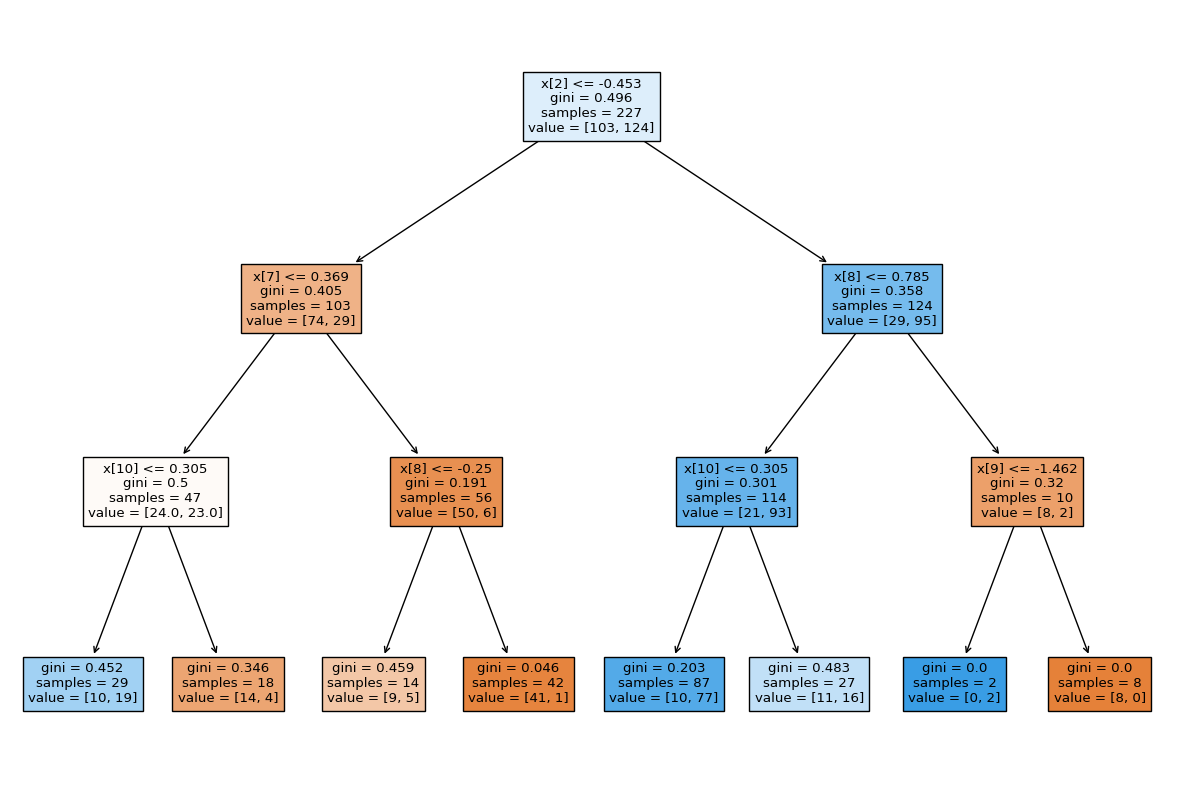

In [55]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [56]:
#make prediction
y_pred=treeclassifier.predict(X_test)

In [57]:
score=accuracy_score(y_pred,y_test)
print(score)
print()
print(classification_report(y_pred,y_test))

0.8552631578947368

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        36
           1       0.85      0.88      0.86        40

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [58]:
# now lets try randomforest
rf_classifier=RandomForestClassifier(n_estimators=200,random_state=42)

In [59]:
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [60]:
y_pred=rf_classifier.predict(X_test)

In [63]:
accuracy=accuracy_score(y_test,y_pred)
print()
print(f'Accuracy :{accuracy}')
print()
precision,recall,f1_score,_=precision_recall_fscore_support(y_test,y_pred)


Accuracy :0.9078947368421053



In [64]:
# now check model performance on test data
X_test_prediction = rf_classifier.predict(X_test)
accuracy=accuracy_score(y_test,X_test_prediction)

In [65]:
print(accuracy)

0.9078947368421053


# Model Summary
* Logistic regression:- 88%
* Decision Tree:- 85%
* RandomForest:- 90%

In [66]:
# so we move foreward with Random Forest

In [67]:
import pickle
pickle.dump(scaler,open('Hert_scaler.pkl','wb'))
pickle.dump(rf_classifier,open('Hert.pkl','wb'))